## Introduction

For our project, we were tasked with using datasets from the Western Pennsylvania Regional Data Center in order to come up with a "best neighborhood" via a matric of our choosing. After discussing, we decided to focus on the saftey of each neighborhood, as we all agreed that it is important to live in a safe neighborhood. We considered doing other metrics such as quality of education and acccess to food, but ended up going with saftey as the main metric to focus on, as much of the datasets on the WPRDC are directly related to saftey.

## The Metrics

### Metric 1: Arrest Rates

In order to measure saftey, one metric that we can look at is the arrest data and how frequent arrests are in each neighborhood. Generally a neighborhood with lower arrest rates would be safer. From the Western Pennsylvania Regional Data Center, we can use both the arrest data dataset provided by the Pittsburgh police and the 2020 census dataset provided by the 2020 census for the neighborhood populations.

To fairly measure this metric, we need both the arrest data and the population data in order to look at the rate of crime rather than just the raw arrest numbers. That way, neighborhoods can be compared relatively, and we won't have a scenario where all the best neighborhoods are just the smallest and all the worst ones are the largest, as they would have lower and higher arrest rates respectively.

First, we will import all the necessary libraries in order to read, manipulate and display the data. Then we will read both of the datasets into corresponding data frames.

In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# read in arrest data
arr = pd.read_csv("ArrestsDataset.csv", sep=",")
#read in population data
pop = pd.read_csv("NeighborhoodPopulation.csv", sep=",")

Next, we will create a 2 dictionaries. One for a neighborhood-population realtion and one for a neighborhood-number of offenses relation. For each of them, we will itterate through the corresponding dataframe and populate the dictionary with the neighborhood as the key. The value pair for population is the 2020 total population for that neighborhood, and for arrests we just incriment that neighborhood by one in order to increase the count of arrests.



In [2]:
#define dict for populations
population = {}
#iterate and assign population to each neighborhood
for index,row in pop.iterrows():
    population[row["Neighborhood"]] = row["2020_Total_Population"]
    
#define dict for offenses
offenses =  defaultdict(int)
#iterate and assign # of offenses to each neighborhood
for index,row in arr.iterrows():
    offenses[row["INCIDENTNEIGHBORHOOD"]] += 1

Next we will define a set of neighborhoods that are contained within our population dataset that aren't contained in our arrest dataset. This is to ensure that we only look at neighborhoods that we have a well defined population for, and don't try to access something that doesn't exist within the arrest dataset.

In [3]:
#create sets of neighborhoods
arr_neighborhoods = set(arr['INCIDENTNEIGHBORHOOD'])
pop_neighborhoods = set(pop['Neighborhood'])
#get missing neighborhoods by set difference
missing_neighborhoods = pop_neighborhoods - arr_neighborhoods

Now that we fully prepared our two datasets, we can create a crimerate dictionary to map the crimerate relative to population to each neighborhood. We will then sort that into a list.

In [4]:
#make crimerate dict
crimerate = {}
#iterate through population
for key in population:
    #make sure we are only accessing neighborhoods in both datasets
    if key not in (missing_neighborhoods):
        #calculate crime rate for each neighborhood
        crimerate[key] = offenses[key] / population[key]

#sort by crimerate
sorted_crimerate = sorted(crimerate.items(), key=lambda x: x[1])

Looking into the crime rate of each neighborhood, we want to make sure that we're getting values that make sense. The only values that don't make sense are the ones with the highest arrest rates, much higher than 1 arrest per person, which is unrealistic. This could be due to a variety of reasons, the recency of the arrest data, the way neighborhood regions are divided beween datasets, small populations in neighborhoods or more. Luckily, that is only true of the neighborhoods with the highest arrest rate, which we are not interested in. We will avoid this by examaning only the top contendors later.

In [5]:
for key, value in sorted_crimerate:
    print(f"Neighborhood: {key}, Crime Rate: {value}", "pop: ", population[key])

Neighborhood: Central Northside, Crime Rate: 0.007738896366083445 pop:  2972
Neighborhood: Squirrel Hill North, Crime Rate: 0.023907736341442883 pop:  11879
Neighborhood: Swisshelm Park, Crime Rate: 0.03136669156086632 pop:  1339
Neighborhood: Regent Square, Crime Rate: 0.037075180226570546 pop:  971
Neighborhood: North Oakland, Crime Rate: 0.040501356280984 pop:  10691
Neighborhood: New Homestead, Crime Rate: 0.04252998909487459 pop:  917
Neighborhood: Stanton Heights, Crime Rate: 0.04946916647842783 pop:  4427
Neighborhood: Squirrel Hill South, Crime Rate: 0.05275184435594438 pop:  15317
Neighborhood: Point Breeze, Crime Rate: 0.055534779356768885 pop:  5348
Neighborhood: Morningside, Crime Rate: 0.05688806888068881 pop:  3252
Neighborhood: Shadyside, Crime Rate: 0.06163086766338056 pop:  15317
Neighborhood: Westwood, Crime Rate: 0.0666266506602641 pop:  3332
Neighborhood: Banksville, Crime Rate: 0.06978434698328083 pop:  4127
Neighborhood: Lincoln Place, Crime Rate: 0.07036450079239

Now, we will create a dataframe using our sorted crimerate list, with a coulmn for neighborhood name and one for the crime rate we jusr calculated. At the same time, we will make another dataframe of the 10 neighborhoods with the lowest crimerate for easier visualization.

In [6]:
#make crimerate dataframe
crimerate_df = pd.DataFrame(sorted_crimerate, columns=['Neighborhood', 'Crime Rate'])
#make top 10 neighborhoods by crimerate dataframe
top_10_neighborhoods = crimerate_df.sort_values(by='Crime Rate', ascending=True).head(10)

Now we will vizualize the results of our data exploration using matplotlib. Looking at all of the neighborhoods at once is overwhelming, as the outlier data mentioned above makes the data hard to see, so we can cut off the last 30 neighborhoods to get a feel for the bulk of the data, and see those neighborhood's names easier.

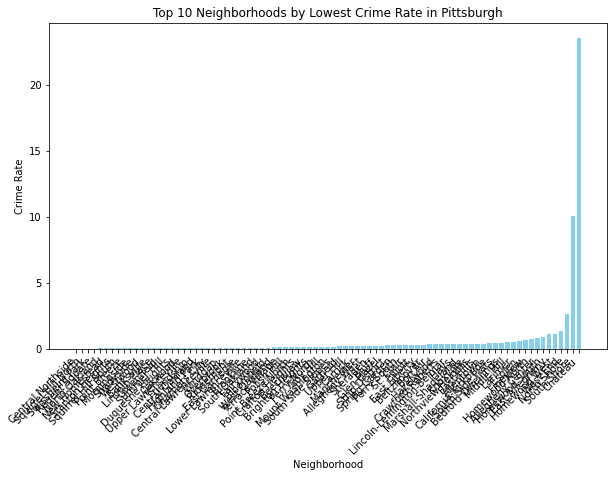

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(crimerate_df['Neighborhood'], crimerate_df['Crime Rate'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')
plt.title('Top 10 Neighborhoods by Lowest Crime Rate in Pittsburgh')
plt.xticks(rotation=45, ha='right')
plt.show()

Cutting off the bottom 30 lets us see that most neighborhoods lie below 30%

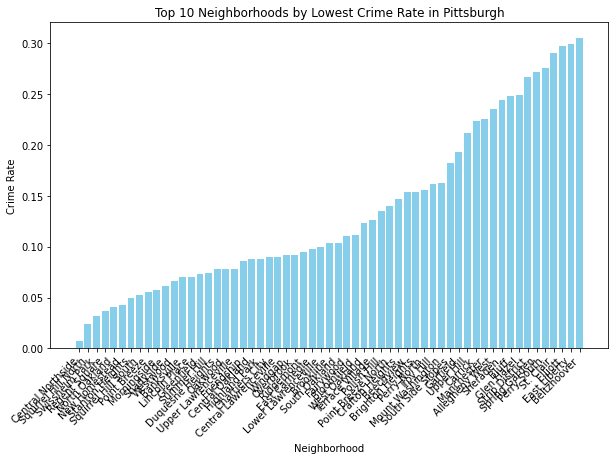

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(crimerate_df.head(59)['Neighborhood'], crimerate_df.head(59)['Crime Rate'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')
plt.title('Top 10 Neighborhoods by Lowest Crime Rate in Pittsburgh')
plt.xticks(rotation=45, ha='right')
plt.show()

Now let's just look at the top 10 neighborhoods


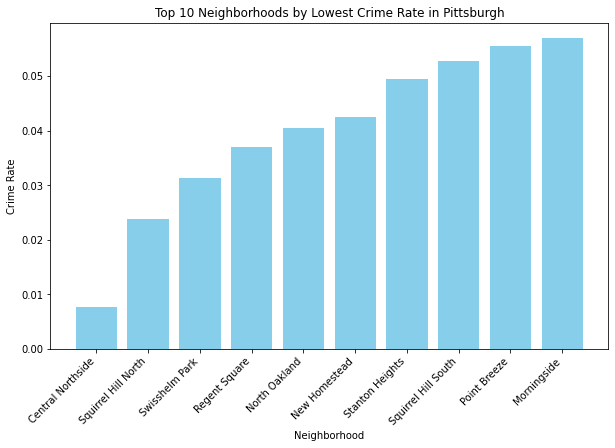

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['Neighborhood'], top_10_neighborhoods['Crime Rate'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')
plt.title('Top 10 Neighborhoods by Lowest Crime Rate in Pittsburgh')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see from the bar graph that the neighborhood that has the lowest number of arrests proportional to the population of the neighborhood is Central Northside.

# RYLAN'S SECTION

In [10]:
import pandas as pd
import geopandas
%matplotlib inline

fire_incidents = pd.read_csv("Fire_Incidents.csv")

#Seperating different fields
incident_description = fire_incidents["type_description"]

cities = fire_incidents["address"]

#City names are present after the comma in the address, so I split the address the comma,
#grabbed the second section, and then split by space and grabbed the second section
for i in range(len(cities)):
    city = (cities.iloc[i]).split(",")[1]
    city = city.split(" ")[1]
    cities.at[i] = city
    
#counts unique call numbers in each neighborhood
neighborhood_fires = fire_incidents.groupby('neighborhood').nunique()['call_no']


neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

FileNotFoundError: [Errno 2] No such file or directory: 'Fire_Incidents.csv'

In [ ]:
#Time to merge number of fires with neighborhoods
fires_map = neighborhoods.merge(neighborhood_fires, how='left', left_on='hood', right_on='neighborhood')
#steps_map[['hood', 'call_no', 'geometry']]

In [ ]:
fires_map.plot(column='call_no',
               cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Fires"},
               figsize=(15,10)
              )

In [ ]:
#plot of 20 safest neighborhoods
least_neighborhoods = neighborhood_fires.sort_values().head(20)
least_fires_map = neighborhoods.merge(least_neighborhoods, how='left', left_on='hood', right_on='neighborhood')

#List the 20 safest neighborhoods
print(least_neighborhoods)

In [ ]:
least_fires_map.plot(column='call_no',
               cmap='Blues',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Fires"},
               figsize=(15,10),
               missing_kwds={"color" : "lightgrey"}
              )

# Now Considering Population - Part 2

In [ ]:
#Next, consider population in fire map
neighborhood_population = pd.read_csv("../NeighborhoodPopulation.csv")

#Fix some of the mismatched neighborhood names
neighborhood_population.at[15, "Neighborhood"] = "Central Business District"
neighborhood_population.at[73, "Neighborhood"] = "Spring Hill-City View"

import numpy as np
#print(np.in1d(neighborhood_population["Neighborhood"].unique(), fire_incidents["neighborhood"].unique()) )

#Now diving number of population by number of fires
for i in range(len(neighborhood_population["Neighborhood"])):
    if (np.isin(neighborhood_population.at[i, "Neighborhood"], fire_incidents["neighborhood"].unique() )):
        neighborhood_name = neighborhood_population.at[i, "Neighborhood"]
        neighborhood_pop = neighborhood_population.at[i, "2010_Total_Population"]
        fires_map_index = fires_map[fires_map["hood"]==neighborhood_name].index[0]
        
        fires_map.at[fires_map_index, "call_no"] = neighborhood_pop / fires_map.at[fires_map_index, "call_no"]
print(fires_map["call_no"].sort_values())

In [ ]:
fires_map.plot(column='call_no',
               cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Fires"},
               figsize=(15,10)
              )

In [ ]:
#plot of 20 safest neighborhoods
least_fires_map = fires_map.copy(deep=True)
least_fires_map.sort_values(by="call_no", inplace=True, ignore_index=True, ascending=False)
least_fires_map.loc[20:, "call_no"] = np.NaN

print(least_fires_map["call_no"].head(25))

#List the 10 safest neighborhoods

In [ ]:
least_fires_map.plot(column='call_no',
               cmap='Blues',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Fires"},
               figsize=(15,10),
               missing_kwds={"color" : "lightgrey"}
              )

# Now Looking at Different Graphs

In [ ]:
fires_map.index = fires_map["hood"]
fires_map.sort_values(by="call_no", inplace=True)
fires_map[["call_no", "hood"]].plot(kind="barh", title="Chance of fire (People/Fire)")
print(fires_map["call_no"])

In [ ]:
least_fires_map.dropna(inplace=True)
least_fires_map.index = least_fires_map["hood"]
least_fires_map[["call_no", "hood"]].plot(kind="barh", title="Chance of fire (People/Fire)")

# In terms of a chance of fire below are the five best options
* Westwood with 114 people per fire
* Morningside with 105 people per fire
* Regent Square with 103 people per fire
* Squirrel Hill North with 87 people per fire
* Swisshelm Park with 85 people per fire

## Evan's section

## Non-traffic violation
This dataset shows the incidents that happen in different neighborhoods. I basically measure which neighborhood has the most and least incident and the average age of some neighborhoods that happens incidents the most. I will also list some offenses that happen the most.

In [ ]:
import pandas as pd

In [ ]:
violation=pd.read_csv("non-traffic.csv")

In [ ]:
violation.head(5)

In [ ]:
violation.drop(columns=['_id','PK','CCR','CITEDTIME','INCIDENTLOCATION','ZONE','INCIDENTTRACT',
                        'COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X','Y'])

---

In [ ]:
violation['NEIGHBORHOOD'].value_counts()

In [ ]:
violation['NEIGHBORHOOD'].value_counts().plot(kind='bar', rot=0, figsize=(20,10));

In [ ]:
violation['NEIGHBORHOOD'].value_counts().head(10)

In [ ]:
violation['NEIGHBORHOOD'].value_counts().head(10).plot(kind='bar', rot=0, figsize=(20,10));

In [ ]:
violation['NEIGHBORHOOD'].value_counts().tail(10)

In [ ]:
violation['NEIGHBORHOOD'].value_counts().tail(10).plot(kind='bar', rot=0, figsize=(20,10));

---

In [ ]:
violation['AGE'].mean()

In [ ]:
query_mask = violation['NEIGHBORHOOD']== "South Side Flats"
south=violation[query_mask]
south['AGE'].mean()

In [ ]:
query_mask2 = violation['NEIGHBORHOOD']== "Central Business District"
central=violation[query_mask2]
central['AGE'].mean()

In [ ]:
query_mask3 = violation['NEIGHBORHOOD']== "Central Oakland"
centralO=violation[query_mask3]
centralO['AGE'].mean()

In [ ]:
query_mask4 = violation['NEIGHBORHOOD']== "North Shore"
north=violation[query_mask4]
north['AGE'].mean()

In [ ]:
age = [['All neighborhood', 33.027],['South Side Flats', 27.606],['Central Business District', 38.731], 
       ['Central Oakland', 23.650], ['North Shore', 30.852]]
df=pd.DataFrame(age, columns=['neighborhood','mean value'])
df

In [ ]:
df.plot.bar(x='neighborhood', y='mean value', xlabel='neighborhood', ylabel='mean value', title='The Graph', 
            rot=0, figsize=(14,10));

---

In [ ]:
violation['OFFENSES'].value_counts().head(5)

#### Top 5 offenses:
* Public Drunkeness
* Harassment by Physical Contact
* Possessing a small amount of marijuana
* Engage in fighting
* Urination and defecation in any public place

In [ ]:
top = [['Public Drunkness', 3081],['Harassment by physical contact', 1519],['Possessing marijuana', 1262], 
       ['Engaging in fighting', 1260], ['Urination and defecation in public', 1254]]
df2=pd.DataFrame(top, columns=['violation','count'])
df2

In [ ]:
df2.plot.bar(x='violation', y='count', xlabel='violation', ylabel='count', rot=0, figsize=(15,10))

---

### Best Neighborhood: Swisshelm Park

### Conclusion:
The reason I choose Mt.Oliver Boro as the best neighborhood is simply because it has the least incidents out of 97 neighborhoods. By the analysis, it's likely assuming that the fewer younger people the neighborhood has, the fewer incidents would happen. The most offensive is public drunkness, so the neighborhood has fewer bars and nightlife will also likely be more peaceful.


### Conclusion: Marlon
The neighborhood we identified as safest and therefor best, Swisshelm park, did suprise me. Given that I grew up in Pittsburgh, I was aware of swisshelm park but I never would have guessed it as the best neighborhood. Most of the other high ranked neighborhoods in my metric (arrest rates) I expected, like the Mexican War streets and Squirrel Hill. I think smaller neighborhoods tend to be favored especially in the case of a negative metric, like the ones that we chose.
